In [ ]:
  #loading in necessary toolboxes
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn import tree
from sklearn.ensemble import RandomForestClassifier
from sklearn.inspection import permutation_importance
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn import linear_model
from sklearn.metrics import r2_score
from sklearn.pipeline import make_pipeline
from scipy.stats import skew
from sklearn.linear_model import LinearRegression, Ridge, LassoCV
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import SGDRegressor
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.metrics import log_loss, accuracy_score
from sklearn import linear_model
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from sklearn.svm import SVR
from sklearn.metrics import mean_absolute_error
from xgboost.sklearn import XGBRegressor
from sklearn.model_selection import RepeatedKFold
from numpy import absolute
#import graphviz
import xgboost as xgb

Loading data

In [ ]:
#loading data, it is split into 3 files each corresponding to the month it was collected in
df_august = pd.read_csv('https://raw.githubusercontent.com/WitoldSurdej/PFML/master/apartments_pl_2023_08.csv')
df_september = pd.read_csv('https://raw.githubusercontent.com/WitoldSurdej/PFML/master/apartments_pl_2023_09.csv')
df_october = pd.read_csv('https://raw.githubusercontent.com/WitoldSurdej/PFML/master/apartments_pl_2023_10.csv')

In [ ]:
#displaying data
df_august.head()

,id,city,type,squareMeters,rooms,floor,floorCount,buildYear,latitude,longitude,...,pharmacyDistance,ownership,buildingMaterial,condition,hasParkingSpace,hasBalcony,hasElevator,hasSecurity,hasStorageRoom,price
0,f8524536d4b09a0c8ccc0197ec9d7bde,szczecin,blockOfFlats,63.00,3.0,4.0,10.0,1980.0,53.378933,14.625296,...,0.413,condominium,concreteSlab,NaN,yes,yes,yes,no,yes,415000
1,accbe77d4b360fea9735f138a50608dd,szczecin,blockOfFlats,36.00,2.0,8.0,10.0,NaN,53.442692,14.559690,...,0.205,cooperative,concreteSlab,NaN,no,yes,yes,no,yes,395995
2,8373aa373dbc3fe7ca3b7434166b8766,szczecin,tenement,73.02,3.0,2.0,3.0,NaN,53.452222,14.553333,...,0.280,condominium,brick,NaN,no,no,no,no,no,565000
3,0a68cd14c44ec5140143ece75d739535,szczecin,tenement,87.60,3.0,2.0,3.0,NaN,53.435100,14.532900,...,0.087,condominium,brick,NaN,yes,yes,no,no,yes,640000
4,f66320e153c2441edc0fe293b54c8aeb,szczecin,blockOfFlats,66.00,3.0,1.0,3.0,NaN,53.410278,14.503611,...,0.514,condominium,NaN,NaN,no,no,no,no,no,759000


In [ ]:
df_september.head()

,id,city,type,squareMeters,rooms,floor,floorCount,buildYear,latitude,longitude,...,pharmacyDistance,ownership,buildingMaterial,condition,hasParkingSpace,hasBalcony,hasElevator,hasSecurity,hasStorageRoom,price
0,71de9eb8a92ac12d7c94315228b70cfb,szczecin,tenement,123.45,4.0,2.0,3.0,NaN,53.432586,14.535685,...,0.321,condominium,brick,NaN,no,yes,no,no,yes,799000
1,23d558163bb1c7863c73485048e50858,szczecin,NaN,53.80,2.0,5.0,5.0,NaN,53.429429,14.554642,...,0.073,cooperative,NaN,NaN,no,no,yes,no,no,420000
2,3b8819c6c9ffd55adfddfd5bafcc844d,szczecin,tenement,50.00,2.0,NaN,1.0,NaN,53.364400,14.660900,...,0.399,condominium,brick,NaN,yes,no,no,no,no,350000
3,708ccd264180315a4cfe6324ed4861d0,szczecin,blockOfFlats,55.19,2.0,1.0,2.0,2013.0,53.480364,14.541494,...,0.183,condominium,brick,premium,yes,yes,no,yes,yes,607000
4,8373aa373dbc3fe7ca3b7434166b8766,szczecin,tenement,73.02,3.0,2.0,3.0,NaN,53.452222,14.553333,...,0.280,condominium,brick,NaN,no,no,no,no,no,565000


In [ ]:
df_october.head()

,id,city,type,squareMeters,rooms,floor,floorCount,buildYear,latitude,longitude,...,pharmacyDistance,ownership,buildingMaterial,condition,hasParkingSpace,hasBalcony,hasElevator,hasSecurity,hasStorageRoom,price
0,23d558163bb1c7863c73485048e50858,szczecin,NaN,53.80,2.0,5.0,5.0,NaN,53.429429,14.554642,...,0.073,cooperative,NaN,NaN,no,no,yes,no,no,420000
1,8373aa373dbc3fe7ca3b7434166b8766,szczecin,tenement,73.02,3.0,2.0,3.0,NaN,53.452222,14.553333,...,0.280,condominium,brick,NaN,no,no,no,no,no,565000
2,ede1c0d953ff85f3cd9676d39ca8f62d,szczecin,blockOfFlats,37.00,2.0,8.0,10.0,1970.0,53.442692,14.559690,...,0.205,cooperative,concreteSlab,NaN,no,yes,yes,yes,yes,429995
3,6c807c6c86a74c57a3fd4445a1f49a46,szczecin,apartmentBuilding,48.00,2.0,4.0,6.0,NaN,53.435461,14.570436,...,0.177,condominium,brick,NaN,no,yes,no,no,no,550000
4,bb14c9a540275da73f6cb6ed42e5c26c,szczecin,apartmentBuilding,55.19,2.0,1.0,2.0,2013.0,53.482094,14.542574,...,0.043,condominium,brick,premium,yes,yes,no,yes,yes,607000


In [ ]:
#showing the size of each dataset
print(df_august.shape)
print(df_september.shape)
print(df_october.shape)

(18905, 28)
(16997, 28)
(16690, 28)


Concatenating Data

In [ ]:
#labeling the data from each dataset
df_august['Month'] = 0
df_september['Month'] = 1
df_october['Month'] = 2

In [ ]:
#combining datasets into 1
frames = [df_august, df_september, df_october]
#creating a dataframe
df = pd.concat(frames)

Data processing

In [ ]:
# Shape of dataframe
df.shape

(52592, 29)

In [ ]:
# Checking for missing values
df.isna().sum()

id                          0
city                        0
type                    11650
squareMeters                0
rooms                       0
floor                    9527
floorCount                750
buildYear                9125
latitude                    0
longitude                   0
centreDistance              0
poiCount                    0
schoolDistance             50
clinicDistance            252
postOfficeDistance         73
kindergartenDistance       49
restaurantDistance        154
collegeDistance          1572
pharmacyDistance           79
ownership                   0
buildingMaterial        20505
condition               39819
hasParkingSpace             0
hasBalcony                  0
hasElevator              2688
hasSecurity                 0
hasStorageRoom              0
price                       0
Month                       0
dtype: int64

In [ ]:
#creating temporary data frame
df_temp=df
# Dropping id and columns which have a very high number of missing values, being impossible to apply techniques such as imputation
df.drop(['id','type', 'floor', 'buildYear', 'floorCount', 'condition', 'buildingMaterial'], axis=1, inplace=True)


Definition:
Data imputation is a process used in data analysis and preprocessing to fill in missing or incomplete data with estimated or substituted values. Missing data can be a common issue when dealing with real-world datasets, and imputation methods are used to handle these missing values effectively. Data imputation is essential because many statistical and machine learning algorithms may not work properly with missing data, and imputing values allows you to preserve as much information as possible.

In [ ]:
# Dropping rows which contain missing values
df_clean = df.dropna()

In [ ]:
# Dropping duplicates if any
df_clean = df_clean.drop_duplicates().reset_index(drop=True)

In [ ]:
#displaying cleared data
df_clean.head(5)

,city,squareMeters,rooms,latitude,longitude,centreDistance,poiCount,schoolDistance,clinicDistance,postOfficeDistance,...,collegeDistance,pharmacyDistance,ownership,hasParkingSpace,hasBalcony,hasElevator,hasSecurity,hasStorageRoom,price,Month
0,szczecin,36.00,2.0,53.442692,14.559690,2.15,16.0,0.273,0.492,0.652,...,1.404,0.205,cooperative,no,yes,yes,no,yes,395995,0
1,szczecin,73.02,3.0,53.452222,14.553333,3.24,9.0,0.275,0.672,0.367,...,1.857,0.280,condominium,no,no,no,no,no,565000,0
2,szczecin,87.60,3.0,53.435100,14.532900,2.27,32.0,0.175,0.259,0.223,...,0.310,0.087,condominium,yes,yes,no,no,yes,640000,0
3,szczecin,66.00,3.0,53.410278,14.503611,4.07,1.0,0.218,1.690,0.504,...,2.138,0.514,condominium,no,no,no,no,no,759000,0
4,szczecin,63.30,3.0,53.463100,14.572800,4.48,10.0,0.079,1.224,0.737,...,0.377,0.745,cooperative,yes,yes,no,no,yes,499000,0


In [ ]:
#showing data size after cleaning
df_clean.shape

(47506, 22)

Selecting Numerical and Categorical Columns

In [ ]:
#dropping categorical data
cat_cols = df_clean.select_dtypes(['object']).columns
df_cats = df_clean[cat_cols].reset_index(drop=True)

Data Split

In [ ]:
#splitting data into train and test with proportions 70/30
X1 = df_clean.loc[:, df_clean.columns != 'price']
y1 = df_clean['price'].values

In [ ]:
X1_train, X1_test, y1_train, y1_test = train_test_split(X1, y1, test_size = 0.3, random_state = 42)

In [ ]:
#displaying shape of the split data
print(X1.shape)
print(y1.shape)
print(X1_train.shape)
print(X1_test.shape)

(47506, 21)
(47506,)
(33254, 21)
(14252, 21)


Data visualisation

In [ ]:
num_cols = X1.select_dtypes([np.number]).columns
df_nums = X1[num_cols].reset_index(drop=True)

Box Plot

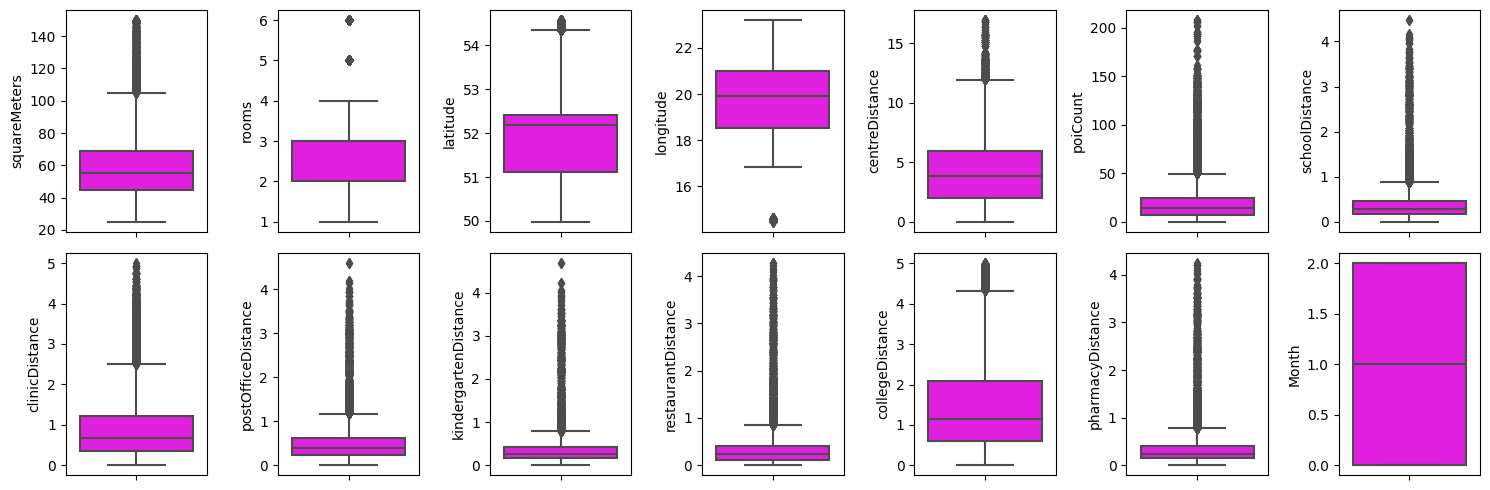

In [ ]:
features = num_cols.to_list()
plt.figure(figsize=(15,5))
for i in range(0, len(features)):
    plt.subplot(2, 7, i + 1)
    sns.boxplot(y = X1[features[i]], color = 'magenta', orient = 'v')
    plt.tight_layout()

Histogram plot

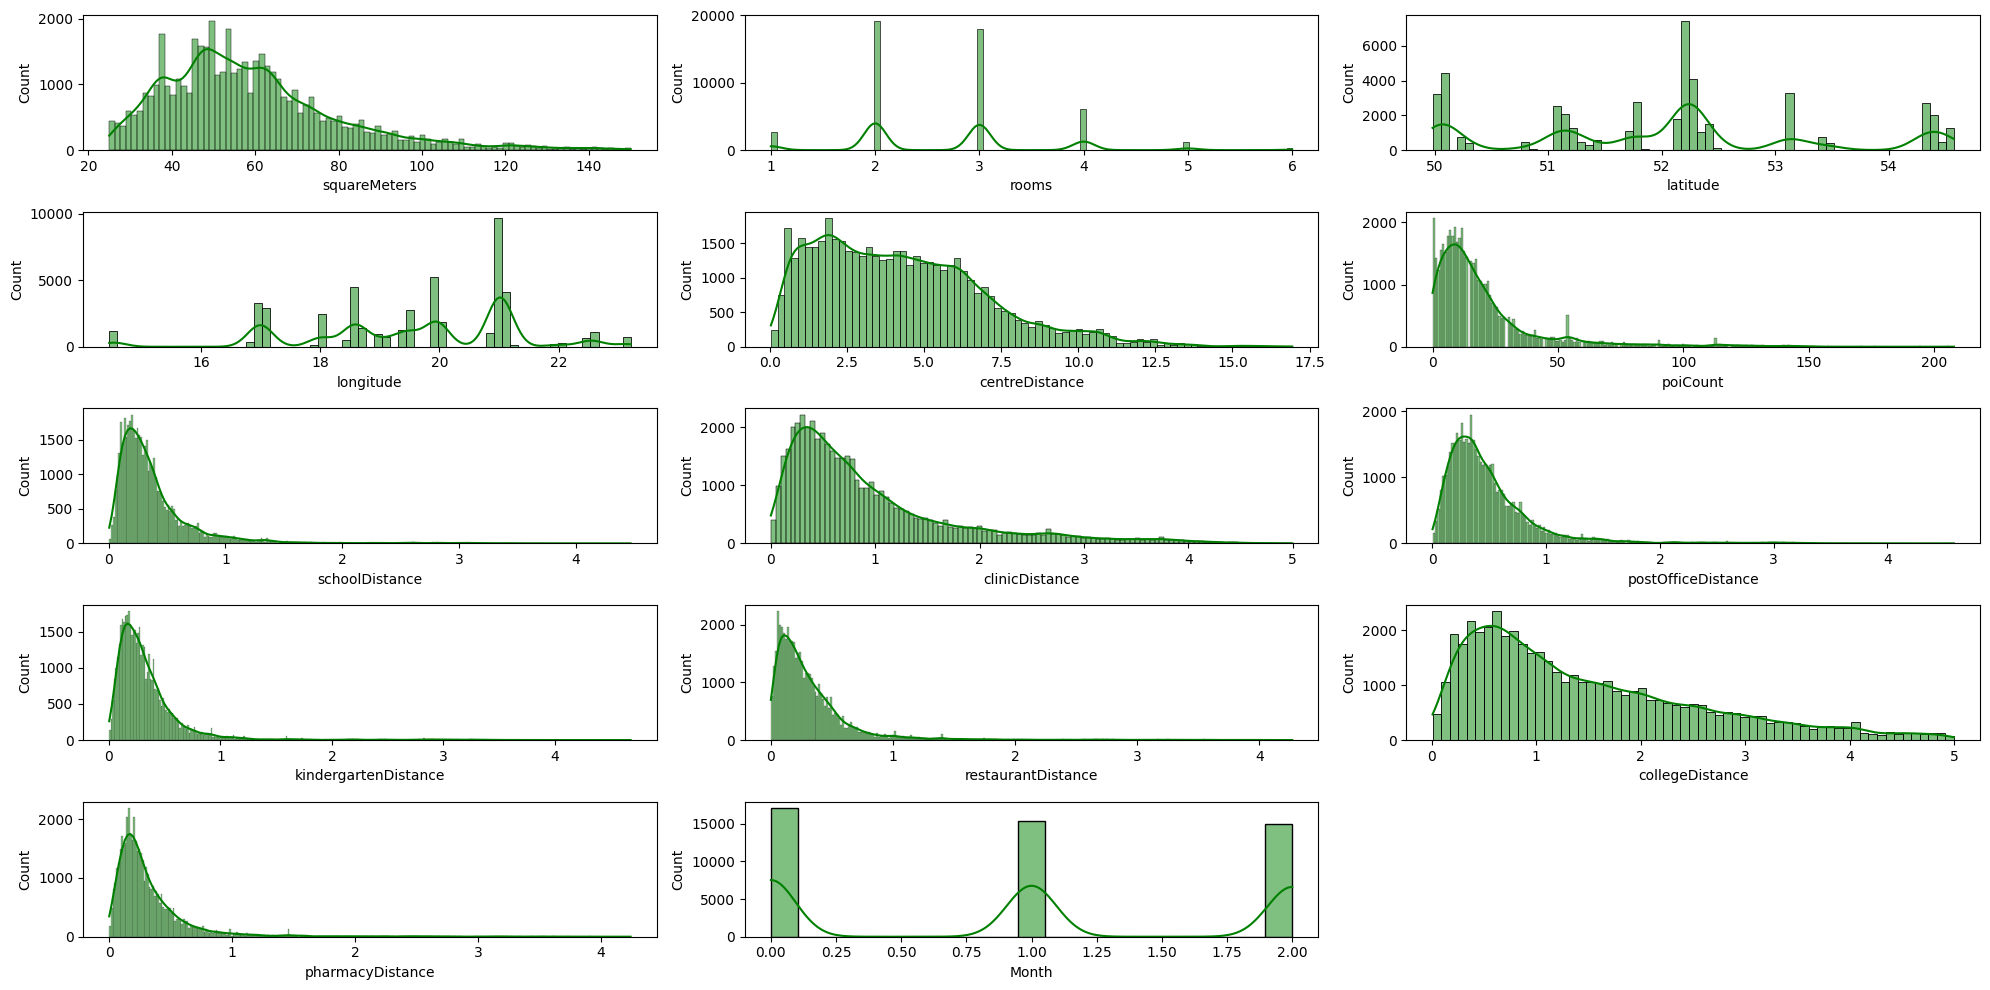

In [ ]:
features = num_cols.to_list()
plt.figure(figsize = (20, 10))
for i in range(0, len(features)):
    plt.subplot(5, 3, i+1)
    sns.histplot(x = X1[features[i]], kde = True, color = 'green')
    plt.tight_layout()

<ipython-input-24-5934a185cdd5>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df_clean.corr(), cmap = 'Blues', annot = True, fmt = '.2f')


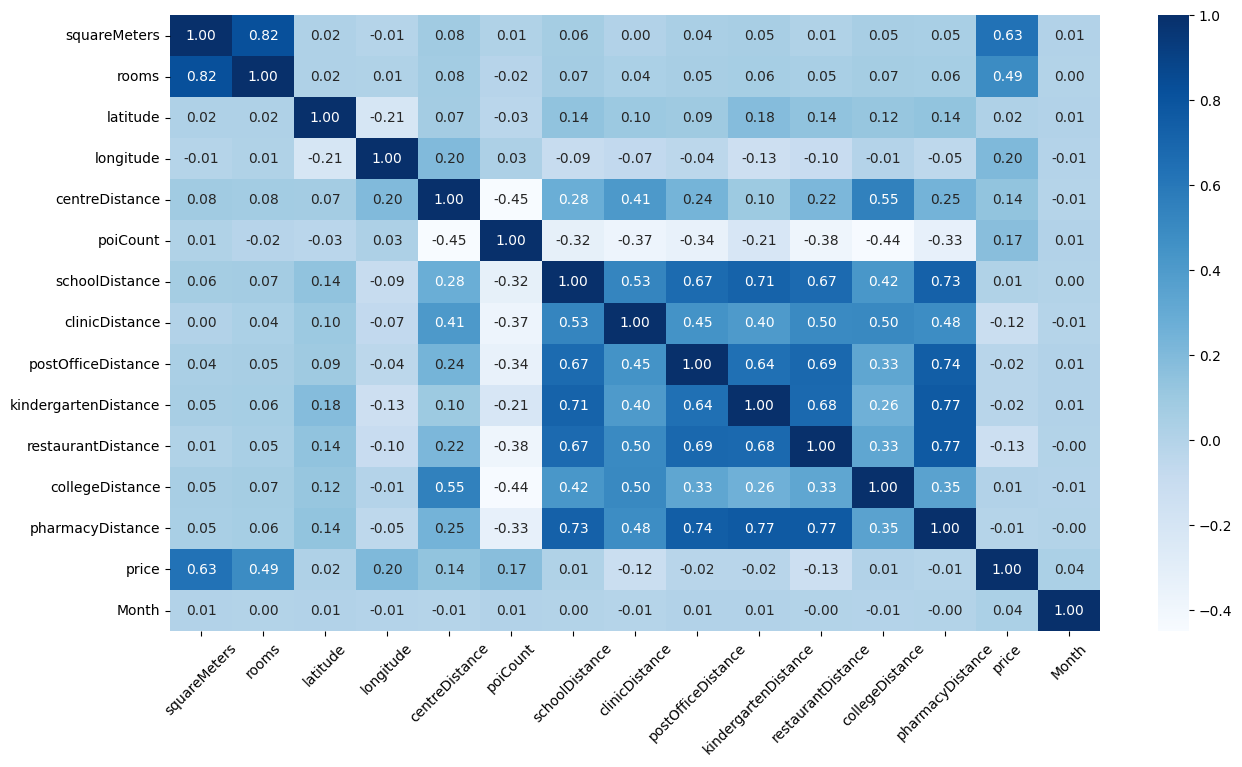

In [ ]:
plt.figure(figsize = (15, 8))
sns.heatmap(df_clean.corr(), cmap = 'Blues', annot = True, fmt = '.2f')
plt.xticks(rotation=45);

In [ ]:
num_cols = X1_train.select_dtypes([np.number]).columns
df_nums_train = X1_train[num_cols].reset_index(drop=True)
num_cols = X1_test.select_dtypes([np.number]).columns
df_nums_test = X1_test[num_cols].reset_index(drop=True)

In [ ]:
clf=tree.DecisionTreeClassifier().fit(df_nums_train,y1_train)

In [ ]:
print(clf.score(df_nums_train,y1_train))
print(clf.score(df_nums_test,y1_test))

0.9872195826066037
0.46849564973337077
